# Making GIFs with Python

## Libraries and Functions

We start our notebook by:

- Importing all necessary libraries, and
- Setting default parameters (mainly for plotting).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
%config InlineBackend.figure_format = 'retina'

import gif
gif.options.matplotlib['dpi'] = 300

from IPython.display import HTML

In [2]:
label_size = 18
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = label_size
plt.rcParams['axes.titlesize'] = label_size
plt.rcParams['xtick.labelsize'] = label_size - 3  # tick labels should be smaller than axes labels (by 3 in our case)
plt.rcParams['ytick.labelsize'] = label_size - 3
plt.rcParams['legend.fontsize'] = label_size - 2
plt.rcParams['legend.frameon'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5

## Importing Data

We can import our data using Panda’s `read_csv()` method. We can also take a look at the top five rows using the `head()` method:

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Energy (eV),4,10,20,30,40,50,75,100,125,150,175,200,225,250,300
0,1.250000,0.766742,0.776573,0.832074,0.995041,-0.031390,-0.046093,-0.716075,-0.034600,-0.046953,0.222405,-0.445984,-0.526429,-0.271327,0.516481,0.382754
1,1.250802,0.620868,-0.107663,0.552513,-0.283963,0.594053,0.278958,0.937134,-0.310856,0.299097,0.076142,-0.405307,-0.267597,-0.230924,0.307567,-0.169506
2,1.251603,0.053624,-0.468385,-0.444236,-1.285166,-0.320740,-0.005035,-0.088117,0.290436,-0.417883,0.765435,0.169703,-0.126334,0.525912,0.553396,-0.171892
3,1.252405,1.207119,0.504979,0.952669,-0.245629,-0.210216,-0.135993,0.324124,0.056357,1.445416,-0.068622,0.302547,0.858122,0.315219,0.827085,0.025023
4,1.253206,-0.491953,0.331249,0.309651,0.433042,0.928061,0.972801,0.538590,-0.211036,-0.130382,0.271441,-0.207939,-0.288964,0.268383,-0.606824,-0.854363


We can create a new array containing only the spectra using the `drop()` method. 

In [4]:
energy = data['Energy (eV)']
data = data.drop(['Energy (eV)'], axis = 1)

T_array = np.array(data.columns, dtype = int)

Following this [post](https://stackoverflow.com/questions/25748183/python-making-color-bar-that-runs-from-red-to-blue), I decided to create a colormap that goes from blue (low temperatures) to red (high temperatures).

In [5]:
columns = range(0, data.shape[1])

# Make a user-defined colormap
cm1 = mcol.LinearSegmentedColormap.from_list('MyCmapName', ['b', 'r'])

# Make a normalizer that will map the time values from
# [start_time,end_time+1] -> [0,1].
cnorm = mcol.Normalize(vmin = min(columns), vmax = max(columns))

# Turn these into an object that can be used to map time values to colors and
# can be passed to plt.colorbar().
cpick = cm.ScalarMappable(norm = cnorm, cmap = cm1)
cpick.set_array([])

## Static Figure

Let's see how our figure would like in a static form.  

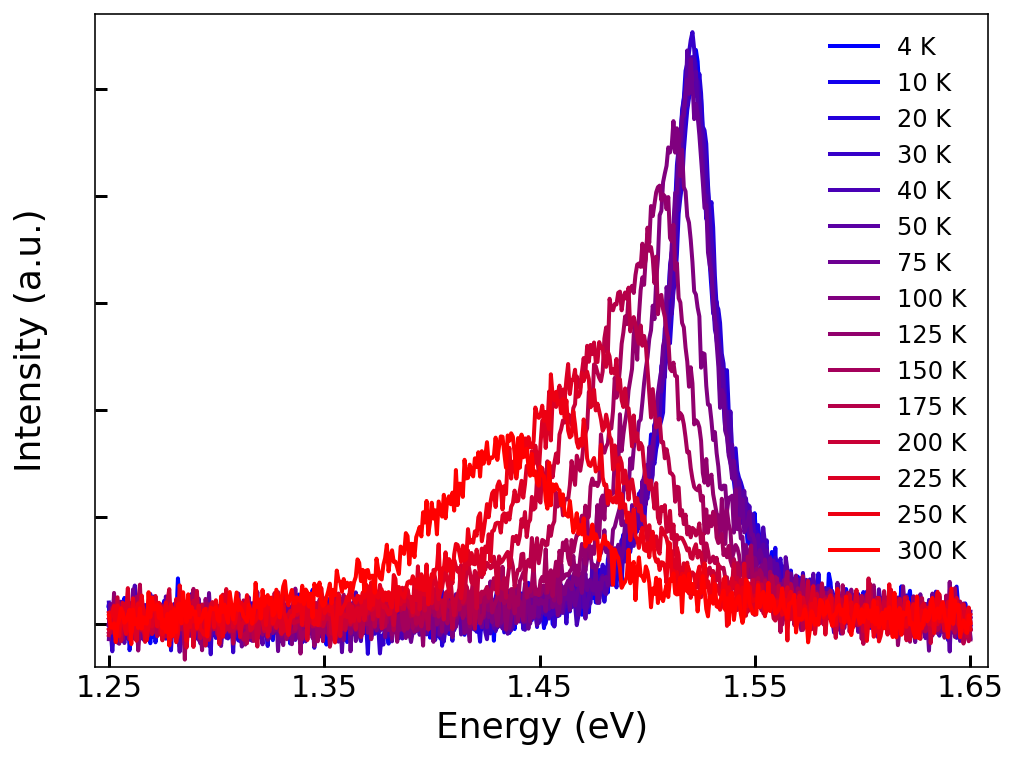

In [6]:
fig = plt.figure(figsize = (8, 6))

for i in range(0, data.shape[1]):
    spectrum = data.iloc[:, i]
    plt.plot(energy, spectrum, color = cpick.to_rgba(i), label = data.columns[i] + ' K')

plt.xlabel('Energy (eV)')
plt.xlim([energy.min() - energy.min()*0.005, energy.max() + energy.max()*0.005])
plt.xticks([1.25, 1.35, 1.45, 1.55, 1.65])

plt.ylabel('Intensity (a.u.)', labelpad = 20)
plt.ylim([-2, 28.5])
plt.yticks([0, 5, 10 , 15, 20, 25], [])  
plt.legend(fontsize = 12);

We can still see the underlying trend; however, the figure is cluttered. This issue could get worse if more spectra are added to the figure. Likely, turning this image into a GIF can help us declutter it and better visualize the change with temperature.  

We can observe that increasing temperature leads to a redshift (decrease in energy) and broadening of the emission peak. However, our goal here is not to study physics, but to create gifs. If you want to know more, please see the following publications:

[1] K. P. O’Donnell and X. Chen, Temperature dependence of semiconductor band gaps, Appl. Phys. Lett. 58, 2924 (1991)

[2] S. Rudin and T. L. Reinecke, Temperature-dependent exciton linewidths in semiconductor quantum wells, Phys. Rev. B 41, 3017 (1990)

## GIF

Following the [official documentation](https://pypi.org/project/gif/), the first step in making gifs is to create a plot function that plots a figure/spectrum and decorate it with `gif.frame`. 

In [7]:
@gif.frame
def plot(i):
    spectrum = data.iloc[:, i]
    title = data.columns[i]
    
    plt.title(title + ' K')
    plt.plot(energy, spectrum, color = cpick.to_rgba(i))
    
    plt.xlabel('Energy (eV)')
    plt.xlim([energy.min() - energy.min()*0.005, energy.max() + energy.max()*0.005])
    plt.xticks([1.25, 1.35, 1.45, 1.55, 1.65])
    
    plt.ylabel('Intensity (a.u.)', labelpad = 20) 
    plt.ylim([-2, 28.5])
    plt.yticks([0, 5, 10 , 15, 20, 25], [])

We then build a bunch of "frames" with a standard for loop, specify the duration of the entire gif and save it.

In [ ]:
frames = []
for i in range(0, data.shape[1]):
    frame = plot(i)
    frames.append(frame)
    
gif.save(frames, 'T-dependence.gif', duration = 10, unit = 's', between = 'startend')

We can view the gif in our notebook by using the HTML package.

In [ ]:
HTML('<img src="./T-dependence.gif" />')